<a href="https://colab.research.google.com/github/alagarde-bit/Computer-Vision/blob/main/lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4466 Computer Vision
## Lab 12 - Panoramas
### 3/21/2022
### Alex Lagarde

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

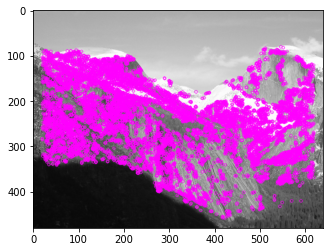

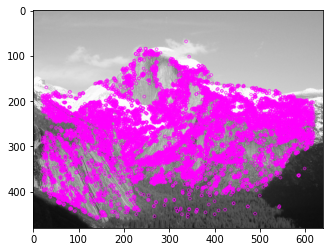

In [ ]:
img1 = cv2.imread('Yosemite1.jpg')
img2 = cv2.imread('Yosemite2.jpg')
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)



MAX_FEATURES = 15000
SCALE_FACTOR = 1.2
SCORE_TYPE = cv2.ORB_HARRIS_SCORE
LEVELS = 8
FAST_THRESH = 20 
EDGE_THRESH = 20
orb = cv2.ORB_create(nfeatures = MAX_FEATURES, 
                     scaleFactor = SCALE_FACTOR,
                     nlevels = LEVELS,
                     scoreType = SCORE_TYPE,
                     fastThreshold = FAST_THRESH,
                     edgeThreshold = EDGE_THRESH)
keypoints = orb.detect(gray_img1)
img_display = gray_img1.copy()
img_display = cv2.drawKeypoints(img_display, keypoints, None, (255,0,255))
orb2 = cv2.ORB_create(nfeatures = MAX_FEATURES, 
                     scaleFactor = SCALE_FACTOR,
                     nlevels = LEVELS,
                     scoreType = SCORE_TYPE,
                     fastThreshold = FAST_THRESH,
                     edgeThreshold = EDGE_THRESH)
keypoints2 = orb.detect(gray_img2)
img_display2 = gray_img2.copy()
img_display2 = cv2.drawKeypoints(img_display2, keypoints2, None, (255,0,255))
plt.imshow(img_display, cmap='gray')
plt.show()
plt.imshow(img_display2, cmap='gray')
plt.show()


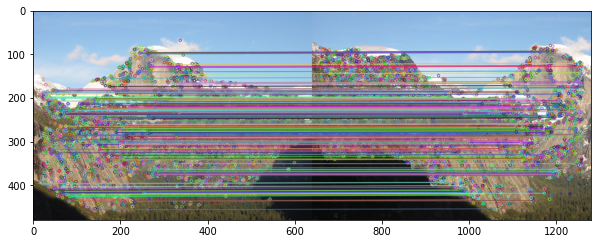

[[ 9.37898010e-01 -3.59800708e-04  2.81047799e+02]
 [-2.59677778e-02  9.82415998e-01  3.32646766e+00]
 [-9.58687834e-05 -1.83316720e-06  1.00000000e+00]]


In [ ]:
def find_keypoints(I):
    kp, des = orb.detectAndCompute(I, None)
    return kp, des

kp_des1 =  find_keypoints(img1)
kp_des2 = find_keypoints(img2)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

def find_matches(im1, im2, kp1, kp2, des1, des2):
    matches = bf.match(des1, des2)
    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)

    # Remove not so good matches
    GOOD_MATCH_PERCENT = 0.05
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    matches = matches[:numGoodMatches]

    # Draw top matches
    disp_matches = cv2.drawMatches(im1, kp1, im2, kp2, matches, None)
    disp_matches = cv2.cvtColor(disp_matches, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(disp_matches)
    plt.show()

    return matches

def find_homography(matches, kp1, kp2):
    ''' Given a set of matching keypoints from two images,
    finds a perspective transform from the first to the second.
    '''

    points1 = np.zeros((len(matches), 2), dtype=float)
    points2 = np.zeros((len(matches), 2), dtype=float)

    for i, match in enumerate(matches):
        points1[i, :] = kp1[match.queryIdx].pt
        points2[i, :] = kp2[match.trainIdx].pt

    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
    print(h)
    return h


matches_GB = find_matches(img2, 
                          img1, 
                          find_keypoints(img2)[0], 
                          find_keypoints(img1)[0],
                          find_keypoints(img2)[1],
                          find_keypoints(img1)[1])
hGB = find_homography(matches_GB, 
                      find_keypoints(img2)[0],
                      find_keypoints(img1)[0])


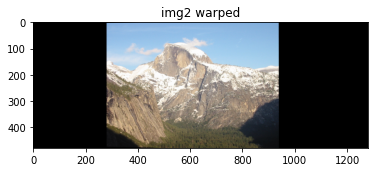

In [ ]:
result = cv2.warpPerspective(img2, hGB,
        (img1.shape[1] + img2.shape[1], img1.shape[0]))
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)
plt.title('img2 warped')
plt.show()

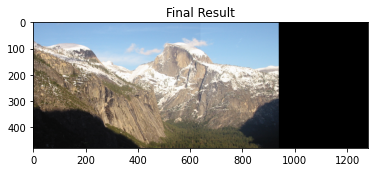

In [ ]:
result[:img1.shape[0], :img1.shape[1]] = img1
result[:img1.shape[0], :img1.shape[1]] = cv2.cvtColor(result[:img1.shape[0], :img1.shape[1]], cv2.COLOR_BGR2RGB)
plt.imshow(result)
plt.title('Final Result')
plt.show()

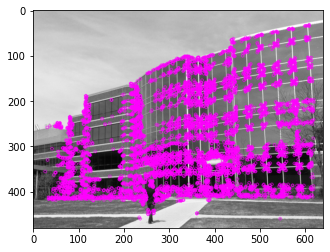

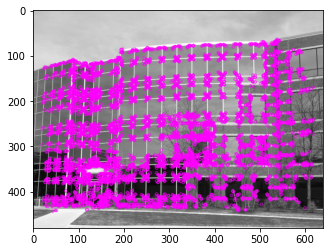

In [ ]:
img3 = cv2.imread('building1.jpg')
img4 = cv2.imread('building2.jpg')
gray_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
gray_img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)



MAX_FEATURES = 8000
SCALE_FACTOR = 1.2
SCORE_TYPE = cv2.ORB_HARRIS_SCORE
LEVELS = 8
FAST_THRESH = 20 
EDGE_THRESH = 20
orb3 = cv2.ORB_create(nfeatures = MAX_FEATURES, 
                     scaleFactor = SCALE_FACTOR,
                     nlevels = LEVELS,
                     scoreType = SCORE_TYPE,
                     fastThreshold = FAST_THRESH,
                     edgeThreshold = EDGE_THRESH)
keypoints3 = orb3.detect(gray_img3)
img_display3 = gray_img3.copy()
img_display3 = cv2.drawKeypoints(img_display3, keypoints3, None, (255,0,255))
orb4 = cv2.ORB_create(nfeatures = MAX_FEATURES, 
                     scaleFactor = SCALE_FACTOR,
                     nlevels = LEVELS,
                     scoreType = SCORE_TYPE,
                     fastThreshold = FAST_THRESH,
                     edgeThreshold = EDGE_THRESH)
keypoints4 = orb4.detect(gray_img4)
img_display4 = gray_img4.copy()
img_display4 = cv2.drawKeypoints(img_display4, keypoints4, None, (255,0,255))
plt.imshow(img_display3, cmap='gray')
plt.show()
plt.imshow(img_display4, cmap='gray')
plt.show()

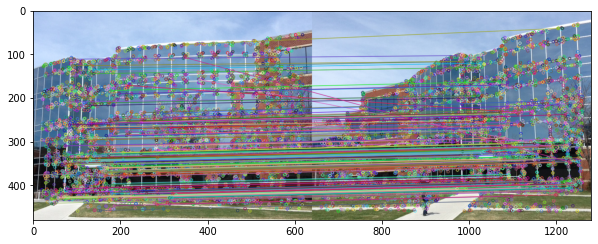

[[ 7.82398711e-01  7.42816843e-02  2.49002289e+02]
 [-1.47418283e-01  9.34949177e-01  8.44884357e+00]
 [-3.53798464e-04  8.36016537e-06  1.00000000e+00]]


In [ ]:
matches_GB2 = find_matches(img4, 
                          img3, 
                          find_keypoints(img4)[0], 
                          find_keypoints(img3)[0],
                          find_keypoints(img4)[1],
                          find_keypoints(img3)[1])
hGB2 = find_homography(matches_GB2, 
                      find_keypoints(img4)[0],
                      find_keypoints(img3)[0])

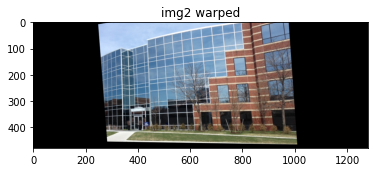

In [ ]:
result2 = cv2.warpPerspective(img4, hGB2,
        (img3.shape[1] + img4.shape[1], img3.shape[0]))
result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
plt.imshow(result2)
plt.title('img2 warped')
plt.show()

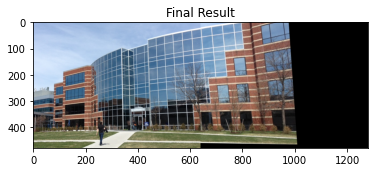

In [ ]:
result2[:img3.shape[0], :img3.shape[1]] = img3
result2[:img3.shape[0], :img3.shape[1]]= cv2.cvtColor(result2[:img3.shape[0], :img3.shape[1]], cv2.COLOR_BGR2RGB)
plt.imshow(result2)
plt.title('Final Result')
plt.show()